In [1]:
import pandas as pd
import csv

In [ ]:
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
nltk.download('all')

In [3]:
# # Converting .txt files to .csv files. It will run only one time.

# with open('SMSSpamCollection.txt', 'r') as text_file:
#     lines = text_file.readlines()

# # Open a CSV file for writing
# with open('SMSSpamCollection.csv', 'w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # Iterate through each line in the text file
#     for line in lines:
#         # Split the line into words
#         words = line.strip().split()

#         # Check if there are at least two words in the line
#         if len(words) >= 2:
#             # Write the first word in the first column and the rest in the second column
#             csv_writer.writerow([words[0], ' '.join(words[1:])])
#         else:
#             # Handle lines with less than two words, e.g., if the line is empty or contains only one word
#             # In this example, you can choose to skip or handle these lines as needed
#             pass


In [34]:
df = pd.read_csv('SMSSpamCollection.csv')

In [62]:
spam_df = df[df['class'] == 'spam']
print("Length of spam data :", len(spam_df))

old_ham_df = df[df['class'] == 'ham']

ham_df = old_ham_df.sample(n=747)
print("Length of New ham data :", len(ham_df))

#Made both ham and spam in equal numbers.

Length of spam data : 747
Length of New ham data : 747


In [63]:
# Merge the two DataFrames vertically (concatenate rows).
merged_df = pd.concat([spam_df, ham_df], ignore_index=True)
shuffled_df = merged_df.sample(frac=1.0, random_state=10, ignore_index=True)
Dataset = shuffled_df

In [64]:
Training_data = Dataset[0:1135]   # It is 76% data of 1494. (Total 1135 rows)
Testing_data = Dataset[1135: 1494]   # It is 24% data of 1494. (Total 359 rows)

Naive Bayes Algorithm

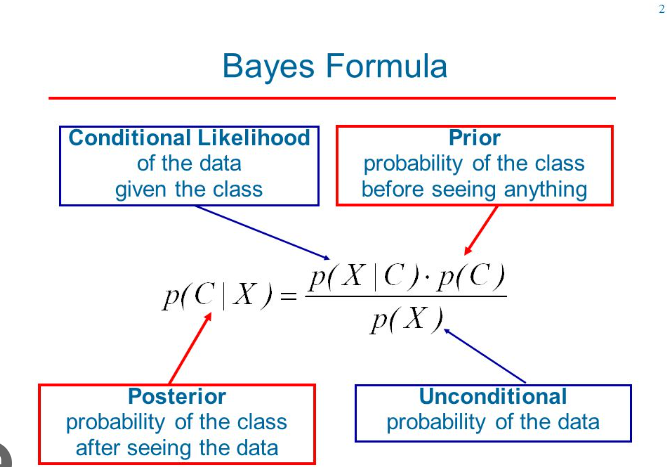

In [76]:
# In The above picture Take C = SpamText or HamText and X = Text.
# Now,
# P(Spam/Text) = ( P(Text/Spam) * P(Spam) ) / P(Text)     ------------ Equation : 1
# P(Ham/Text) = ( P(Text/Ham) * P(Ham) ) / P(Text)        ------------ Equation : 2

# Divide "Equation : 1" by "Equation : 2",
#  result = ( P(Text/Spam) * P(Spam) ) / ( P(Text/Ham) * P(Ham) )
#  result >= 1 Then Spam otherwise Ham.

In [77]:
# We are going to calculate probability of spam and ham
Total_Number_of_dataset = len(Dataset)
Number_of_spam_dataset = len(spam_df)
Number_of_ham_dataset = len(ham_df)

print("Probability of spam dataset :", Number_of_spam_dataset/Total_Number_of_dataset)
print("Probability of ham dataset :", Number_of_ham_dataset/Total_Number_of_dataset)

Probability of spam dataset : 0.5
Probability of ham dataset : 0.5


In [90]:
text = """I love t'o pro"gram in Python. It's a versa"fght"ile language,What do you think?"""

# Word tokenization
words = word_tokenize(text)
print("Word Tokenization:")
print(words)

# Sentence tokenization
sentences = sent_tokenize(text)
print("\nSentence Tokenization:")
print(sentences)

Word Tokenization:
['I', 'love', 't', "'", 'o', 'pro', "''", 'gram', 'in', 'Python', '.', 'It', "'s", 'a', 'versa', "''", 'fght', "''", 'ile', 'language', ',', 'What', 'do', 'you', 'think', '?']

Sentence Tokenization:
['I love t\'o pro"gram in Python.', 'It\'s a versa"fght"ile language,What do you think?']


In [96]:
# Open a CSV file for writing
with open('SMSSpamCollection.csv', newline='') as csv_file:
    # Iterate through each line in the text file
    for line in lines:
        # Split the line into words
        words = line.strip().split()
        print(words)

['ham', 'Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']
['ham', 'Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']
['spam', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18's"]
['ham', 'U', 'dun', 'say', 'so', 'early', 'hor...', 'U', 'c', 'already', 'then', 'say...']
['ham', 'Nah', 'I', "don't", 'think', 'he', 'goes', 'to', 'usf,', 'he', 'lives', 'around', 'here', 'though']
['spam', 'FreeMsg', 'Hey', 'there', 'darling', "it's", 'been', '3', "week's", 'now', 'and', 'no', 'word', 'back!', "I'd", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'to', 'send,', 'Â£1.50', 'to', 'rcv']
['ham', 'Even', 'my', 'brother', 'is', 'not', 'like', 'to', '